In [24]:
import numpy as np
from numpy import exp
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [25]:
np.set_printoptions(legacy='1.25')

## Create Custom Linear Models

In [5]:
def sigmoid(t): 
    """
    Compute the sigmoid of t
    Arguments:
    t -- A numpy array of any size
    Return:
    s -- sigmoid(t)
    """
    s = 1/(1+np.exp(-t))
    return s

In [6]:
x = np.array([2, 3, 4])
print(sigmoid(x))

[0.88079708 0.95257413 0.98201379]


In [7]:
def initialize(dim):
    """  
    Argument:
    dim -- the number of parameters

    Returns:
    w -- initialized vector of shape (1, dim)
    b -- initialized bias weight
    """
    w = np.zeros(dim)
    b = 0

    assert(w.shape == (dim,))
    assert(isinstance(b, float) or isinstance(b, int))

    return w,b

In [8]:
dim = 5
w, b = initialize(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [0. 0. 0. 0. 0.]
b = 0


In [9]:
def compute_cost(w,b,X,Y):
    """
    Arguments:
    w -- weights
    b -- bias
    X -- input data
    Y -- target or label vector

    Return:
    sigma -- the sigmoid of the z
    cost -- cost for logistic regression
    """
    bw = np.insert(w,0,b)
    X =  np.c_[np.ones([np.shape(X)[0], 1]), X] 
    sigma = sigmoid(np.dot(bw,np.transpose(X)))
    cost = -1/(np.shape(X)[0]) * np.sum(Y*np.log(sigma)+(1-Y)*np.log(1-sigma))

    return sigma, cost

In [12]:
w, b, X, Y = np.array([1.,2.]), 2., np.array([[1.,3.],[2.,4.],[-1.,-3.2]]), np.array([1,0,1])
sigma, cost = compute_cost(w, b, X, Y)
print("Sigmoid:",[i for i in sigma])
print("Cost:", str(cost))

Sigmoid: [0.9998766054240137, 0.9999938558253978, 0.004496273160941178]
Cost: 5.801545319394553


In [13]:
def gradient(w,b,X,Y,sigma):
    """
    Arguments:
    w -- weights
    b -- bias
    X -- input data
    Y -- target or label vector

    Return:
    dw -- gradient of the loss with respect to w (numpy array) 
    db -- gradient of the loss with respect to b (scalar)
    """
    bw = np.insert(w,0,b) #(Optional)
    X =  np.c_[np.ones([np.shape(X)[0], 1]), X]
    grad = 1/np.size(Y) * np.dot(np.transpose(X), (sigma-Y)) 
    dw = grad[1:]
    db = grad[0]

    return dw, db

In [14]:
w, b, X, Y = np.array([1.,2.]), 2., np.array([[1.,3.],[2.,4.],[-1.,-3.2]]), np.array([1,0,1])
dw, db = gradient(w, b, X, Y,sigma)
print ("dw = " + str(dw))
print ("db = " + str(db))

dw = [0.99845601 2.39507239]
db = 0.001455578136784208


In [15]:
def update_parameters(w,b,X,Y,num_iterations,learning_rate):
    """
    This function optimizes w and b by running a gradient descent algorithm

      Arguments:
      w -- weights
      b -- bias
      X -- input data
      Y -- target or label vector
      num_iterations -- number of iterations of the optimization loop
      learning_rate -- learning rate of the gradient descent update rule

      Returns:
      params -- dictionary containing the weights w and bias b
      grads -- dictionary containing the gradients of the weights and bias with respect to the cost function.
    """
    for i in range(num_iterations):
        w_prev = w
        b_prev = b

        # Cost and gradient calculation
        sigma, cost = compute_cost(w_prev,b_prev,X,Y)
        dw, db = gradient(w_prev,b_prev,X,Y,sigma)
        # update rule
        w = w_prev - learning_rate*dw
        b = b_prev - learning_rate*db

        # Print the cost every 100 training iterations
        if i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost)) 

    return w,b,dw,db

In [16]:
w, b, X, Y = np.array([1.,2.]), 2., np.array([[1.,3.],[2.,4.],[-1.,-3.2]]), np.array([1,0,1])
w, b, dw, db = update_parameters(w, b, X, Y, num_iterations= 100, learning_rate = 0.009)
print ("w = " + str(w))
print ("b = " + str(b))
print ("dw = " + str(dw))
print ("db = " + str(db))

Cost after iteration 0: 5.801545
w = [0.19033591 0.12259159]
b = 1.9253598300845747
dw = [0.67752042 1.41625495]
db = 0.21919450454067657


In [18]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    Arguments:
    w -- weights
    b -- bias, a scalar
    X -- input data
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    m = X.shape[0]
    Y_prediction = np.zeros((m,))
    
    # Compute vector "sigma" predicting the probabilities of input X
    bw = np.insert(w,0,b) #(Optional)
    X =  np.c_[np.ones([np.shape(X)[0], 1]), X] #(Optional)
    sigma = sigmoid(np.dot(bw,np.transpose(X)))
    
    # Convert probabilities of each instance (of sigma) to actual predictions.
    Y_prediction = np.where(sigma<0.5,0,1)
    
    assert(Y_prediction.shape == (m,))
    
    return Y_prediction

In [19]:
w = np.array([0.1124579,0.23106775])
b = -0.3
X = np.array([[1.,1.2],[-1.1,2.],[-3.2,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [1 1 0]


In [21]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    Arguments:
    X_train -- training set represented by a numpy array
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of update_parameters()

    Returns:
    d -- dictionary containing information about the model.
    """

    # Initialize parameters
    w, b = initialize(np.shape(X_train)[1])

    # Gradient descent
    w, b, dw, db = update_parameters(w,b,X_train,Y_train,num_iterations,learning_rate)
    
    # Predict test/train set examples
    Y_prediction_test = predict(w,b,X_test)
    Y_prediction_train = predict(w,b,X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))


    d = {"Y_prediction_test": Y_prediction_test, 
        "Y_prediction_train" : Y_prediction_train, 
        "w" : w, 
        "b" : b,
        "learning_rate" : learning_rate,
        "num_iterations": num_iterations}

    return d

### Custom Dataset for Training

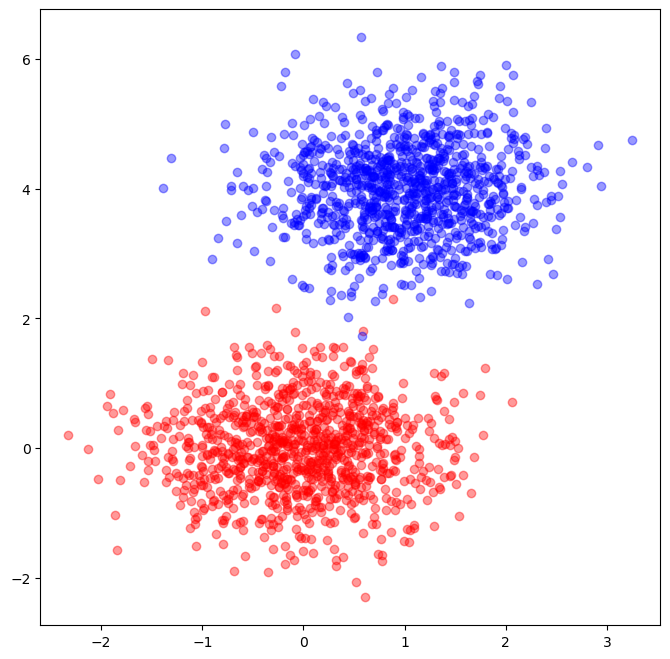

In [34]:
num_observations = 1000 #number of observations of each 
mean_class1 = [0, 0]
mean_class2 = [1, 4]
cov_matrix =  [[0.5, 0],[0, 0.5]]

x1 = np.random.multivariate_normal(mean_class1, cov_matrix,num_observations) # Using the mean for the class 1
x2 = np.random.multivariate_normal(mean_class2, cov_matrix,num_observations) # Using the mean for the class 2

X = np.vstack((x1,x2)) # Combine features together
y = np.hstack((num_observations*[0],num_observations*[1])) #Create the labels 

plt.figure(figsize=(8,8))
plt.scatter(X[0:num_observations, 0], 
            X[0:num_observations, 1],
            c = 'r', alpha = .4)
plt.scatter(X[num_observations:, 0], 
            X[num_observations:, 1],
            c = 'b', alpha = .4)

### Train and Evaluate on the Custom Data

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.411288
Cost after iteration 200: 0.389315
Cost after iteration 300: 0.378070
Cost after iteration 400: 0.369510
Cost after iteration 500: 0.362031
Cost after iteration 600: 0.355127
Cost after iteration 700: 0.348595
Cost after iteration 800: 0.342341
Cost after iteration 900: 0.336317
train accuracy: 91.4 %
test accuracy: 91.9 %


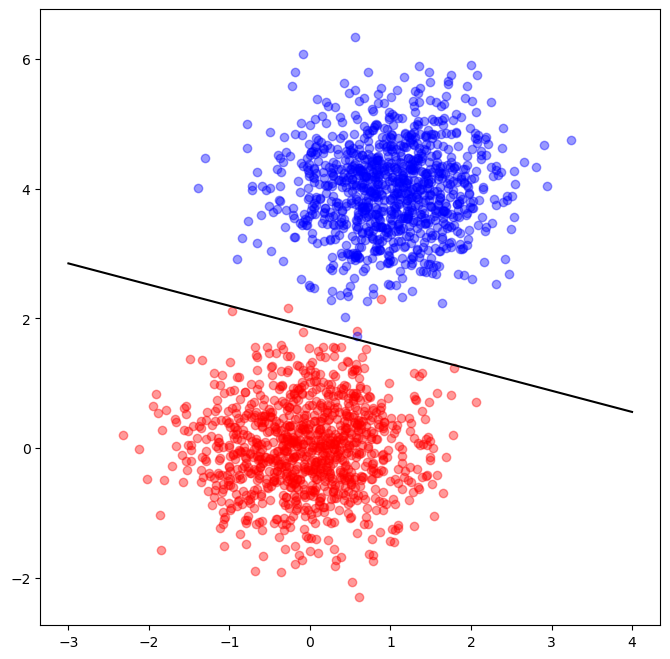

In [46]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.5, random_state=77,shuffle = True)


d = model(X_train,y_train,X_test,y_test,num_iterations = 1000, learning_rate = 0.001)

# Plot again
plt.figure(figsize=(8,8))
plt.scatter(X[0:num_observations, 0], 
            X[0:num_observations, 1],
            c = 'r', alpha = .4)
plt.scatter(X[num_observations:, 0], 
            X[num_observations:, 1],
            c = 'b', alpha = .4)

x_boundary = np.linspace(-3, 4, 1000) # Return evenly spaced numbers over a specified interval.
weights =  d['w'][0]
y_boundary = -((weights*x_boundary/d['w'][1]) + (d['b']/d['w'][1]))

plt.plot(x_boundary, y_boundary, color='black')

## Create Full Custom Class for a Linear Regression Model

In [47]:
class MyLogisticRegression:
    def __init__(self, num_iterations=2000, learning_rate=0.004):
      self.w = None
      self.b = None
      self.num_iterations = num_iterations
      self.learning_rate = learning_rate

    def _sigmoid(self, t):
        """
        Compute the sigmoid of t
        Arguments:
        t -- A numpy array of any size
        Return:
        s -- sigmoid(t)
        """
        s = 1/(1+exp(-t))
        
        return s

    def _initialize(self, dim):
      """  
      Argument:
        dim -- the number of parameters
      """
      self.w = np.zeros(dim)
      self.b = 0

      assert(self.w.shape == (dim,))
      assert(isinstance(self.b, float) or isinstance(self.b, int))


    def _compute_cost(self, X, Y):
        """
        Arguments:
        X -- input data
        Y -- target or label vector
        Return:
        sigma -- the sigmoid of the z
        cost -- cost for logistic regression
        """
        bw = np.insert(self.w,0,self.b) 
        X =  np.c_[np.ones([np.shape(X)[0], 1]), X] 
        sigma = self._sigmoid(np.dot(bw,np.transpose(X)))
        cost = -1/(np.shape(X)[0]) * np.sum(Y*np.log(sigma)+(1-Y)*np.log(1-sigma))

        return sigma, cost

    def _gradient(self, X, Y, sigma):
        """
        Arguments:
        X -- input data
        Y -- target or label vector
        sigma -- the sigmoid of the z
        Return:
        dw -- gradient of the loss with respect to w (numpy array) 
        db -- gradient of the loss with respect to b (scalar)
        """
        bw = np.insert(self.w,0,self.b) 
        X =  np.c_[np.ones([np.shape(X)[0], 1]), X]
        grad = 1/np.size(Y) * np.dot(np.transpose(X), (sigma-Y))
        dw = grad[1:]
        db = grad[0]        

        return dw, db

    def _update_parameters(self, X, Y):
        """
        This function optimizes w and b by running a gradient descent algorithm

          Arguments:
          X -- input data
          Y -- target or label vector

          Returns:
          params -- dictionary containing the weights w and bias b
          grads -- dictionary containing the gradients of the weights and bias with respect to the cost function.
        """
        for i in range(self.num_iterations):
            w_prev = self.w
            b_prev = self.b

            sigma, cost = self._compute_cost(X, Y)
            dw, db = self._gradient(X, Y, sigma)

            self.w = w_prev - self.learning_rate*dw
            self.b = b_prev - self.learning_rate*db      

        return dw,db

    def predict(self, X):
        '''
        Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
        
        Arguments:
        X -- input data
        
        Returns:
        Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
        '''
        m = X.shape[0]
        Y_prediction = np.zeros((m,))
        
        # Compute vector "sigma" predicting the probabilities of input X
        bw = np.insert(self.w, 0, self.b) 
        X =  np.c_[np.ones([np.shape(X)[0], 1]), X] 
        sigma = self._sigmoid(np.dot(bw,np.transpose(X)))
        
        # Convert probabilities of each instance (of sigma) to actual predictions.
        Y_prediction = np.where(sigma<0.5,0,1)
        assert(Y_prediction.shape == (m,))
        
        return Y_prediction

    def fit_evaluate(self, X_train, Y_train, X_test, Y_test):
        """
        Arguments:
        X_train -- training set represented by a numpy array
        Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
        X_test -- test set represented by a numpy array of shape
        Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
        num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
        learning_rate -- hyperparameter representing the learning rate used in the update rule of update_parameters()

        Returns:
        d -- dictionary containing information about the model.
        """

        # initialize parameters
        self._initialize(np.shape(X_train)[1])

        # Gradient descent
        dw, db = self._update_parameters(X_train, Y_train)
        
        # Predict test/train set examples
        Y_prediction_test = self.predict(X_test)
        Y_prediction_train = self.predict(X_train)

        # Print train/test Errors
        print("Train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("Test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))


        d = {"Y_prediction_test": Y_prediction_test, 
            "Y_prediction_train" : Y_prediction_train, 
            "w" : w, 
            "b" : b,
            "learning_rate" : self.learning_rate,
            "num_iterations": self.num_iterations}

        return d

In [48]:
linearModel = MyLogisticRegression(1000, 0.001)
d = linearModel.fit_evaluate(X_train, y_train, X_test, y_test)

Train accuracy: 91.4 %
Test accuracy: 91.9 %


### Add Regularization

In [49]:
class MyLogisticRegressionReg:
    def __init__(self, num_iterations=2000, learning_rate=0.004, reg ='l1', reg_par=1): # can also define the regularization hyper-parameter 
      self.w = None
      self.b = None
      self.num_iterations = num_iterations
      self.learning_rate = learning_rate
      self.reg = reg
      self.reg_par = reg_par

    def _sigmoid(self, t):
        """
        Compute the sigmoid of t
        Arguments:
        t -- A numpy array of any size
        Return:
        s -- sigmoid(t)
        """
        s = 1/(1+exp(-t))

        return s

    def _initialize(self, dim):
      """  
      Argument:
        dim -- the number of parameters
      """
      self.w = np.zeros(dim)
      self.b = 0


      assert(self.w.shape == (dim,))
      assert(isinstance(self.b, float) or isinstance(self.b, int))

    
    def _compute_cost(self, X, Y):
        """
        Arguments:
        X -- input data
        Y -- target or label vector
        Return:
        sigma -- the sigmoid of the z
        cost -- cost for logistic regression
        """
        bw = np.insert(self.w,0,self.b) 
        X =  np.c_[np.ones([np.shape(X)[0], 1]), X]
        sigma = self._sigmoid(np.dot(bw,np.transpose(X)))
        if self.reg == 'l1':
            cost = -1/(np.shape(X)[1]) * np.sum(Y*np.log(sigma)+(1-Y)*np.log(1-sigma)) + self.reg_par/np.shape(x)[0]*(np.sum(np.absolute(bw)))
        else:
            cost = -1/(np.shape(X)[1]) * np.sum(Y*np.log(sigma)+(1-Y)*np.log(1-sigma)) + 0.5*self.reg_par/np.shape(x)[0]*(np.sum(np.square(bw)))           


        return sigma, cost
    
    
    def _gradient(self, X, Y, sigma):
        """
        Arguments:
        X -- input data
        Y -- target or label vector
        sigma -- the sigmoid of the z
        Return:
        dw -- gradient of the loss with respect to w (numpy array) 
        db -- gradient of the loss with respect to b (scalar)
        """

        bw = np.insert(self.w,0,self.b)
        X =  np.c_[np.ones([np.shape(X)[0], 1]), X]
        grad = 1/np.size(Y) * np.dot(np.transpose(X), (sigma-Y)) 
        dw = grad[1:]
        db = grad[0]        


        return dw, db

    def _update_parameters(self, X, Y):
        """
        This function optimizes w and b by running a gradient descent algorithm

          Arguments:
          X -- input data
          Y -- target or label vector

          Returns:
          params -- dictionary containing the weights w and bias b
          grads -- dictionary containing the gradients of the weights and bias with respect to the cost function.
        """
        for i in range(self.num_iterations):
            w_prev = self.w
            b_prev = self.b
            sigma, cost = self._compute_cost(X,Y)
                
            dw, db = self._gradient(X, Y, sigma)

            self.w = w_prev - self.learning_rate*dw
            self.b = b_prev - self.learning_rate*db    

        return dw,db

    def predict(self, X):
        '''
        Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
        
        Arguments:
        X -- input data
        
        Returns:
        Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
        '''
        m = X.shape[0]
        Y_prediction = np.zeros((m,))
        
        # Compute vector "sigma" predicting the probabilities of input X
        bw = np.insert(self.w, 0, self.b) 
        X =  np.c_[np.ones([np.shape(X)[0], 1]), X] 
        sigma = self._sigmoid(np.dot(bw,np.transpose(X)))
        
        # Convert probabilities of each instance (of sigma) to actual predictions.
        Y_prediction = np.where(sigma<0.5,0,1)
        assert(Y_prediction.shape == (m,))
        
        return Y_prediction

    def fit_evaluate(self, X_train, Y_train, X_test, Y_test):
        """
        Builds the logistic regression model by calling the function you've implemented previously

        Arguments:
        X_train -- training set represented by a numpy array
        Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
        X_test -- test set represented by a numpy array of shape
        Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
        num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
        learning_rate -- hyperparameter representing the learning rate used in the update rule of update_parameters()

        Returns:
        d -- dictionary containing information about the model.
        """
        # initialize parameters
        self._initialize(np.shape(X_train)[1])

        # Gradient descent
        dw, db = self._update_parameters(X_train, Y_train)
        
        # Predict test/train set examples
        Y_prediction_test = self.predict(X_test)
        Y_prediction_train = self.predict(X_train)

        # Print train/test Errors
        print("Train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("Test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))


        d = {"Y_prediction_test": Y_prediction_test, 
            "Y_prediction_train" : Y_prediction_train, 
            "w" : w, 
            "b" : b,
            "learning_rate" : self.learning_rate,
            "num_iterations": self.num_iterations}

        return d

In [50]:
linearModel = MyLogisticRegressionReg(1000, 0.001, 'l2', 0.001)
d = linearModel.fit_evaluate(X_train, y_train, X_test, y_test)

Train accuracy: 91.4 %
Test accuracy: 91.9 %


In [52]:
X = np.vstack((x1,x2)) # Combine features together
y = np.hstack((num_observations*[0],num_observations*[1])) 

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2,shuffle = True)

print("Using X as input:")
d = linearModel.fit_evaluate(X_train, y_train, X_test, y_test)

# By adding as an extra feature the values of x1^2 and x2^2 (this way we apply a polynomial regression model of 2nd degree) we can make more complex separation boundaries allowing for a better fit to the data.
linearModel = MyLogisticRegression(1000, 0.001)

X = np.c_[X, np.square(X)] # Add squared values of the 1st and 2nd features to the data as 3rd and 4th features

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2,shuffle = True)

print("Using X and X^2 as input:")
d = linearModel.fit_evaluate(X_train, y_train, X_test, y_test)


# We can see that when we add the squared X features the accuracy of the model goes up to ~91%, almost 10% higher than with the simple linear model.
# We can add higher order terms (X^3, X^4 etc) but we risk overfitting our model to the current data. 
# If we use those extra features we should also apply a form of regularization.


# We can set a minimum value e as the lower limit for the overall step in every round of the regression algorithm. 
# This way when the distance between the current and the next point in the n-dimensional space of the theta parameters (here n = 2) is smaller than e, the algorithm stops. 
# While doing this we must be careful when adjusting the step size as we need to make sure that the algorithm converges for the selected value of e.

# There is almost no difference even for larger values of the regularization parameter as we only have two features in the case we are examining and both of them are essential to defining the proper solution. 
# Also the two methods seem to yield the same results something expected as the lasso solution tends to get dominated by the ridge regression algorithm when the predictors are highly correlated.


Using X as input:
Train accuracy: 82.5625 %
Test accuracy: 82.75 %
Using X and X^2 as input:
Train accuracy: 91.875 %
Test accuracy: 88.5 %
